# Intraoperative Functional Thermography 
## univariate semiparametric regression workflow

In [1]:
import ThermalImagingAnalysis as tai
import ActivityPatterns as ap
import h5py
import numpy as np
import matplotlib.pyplot as plt
import time

c:\users\user\anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Load data

In [2]:
pPenalty = "Penalty_Gaussian_1024fr_2.5Hz_TruncatedWaveletBasis.mat"

In [3]:
pioData = 'io_data/seq_1074564.mat'
f = h5py.File(pioData, "r")
S = np.array(f["seq"].value).transpose()
T = np.squeeze(np.array(f["T"].value))
f.close()

In [4]:
S2 = S[0:1024,]
T2 = T[0:1024,]

In [5]:
f_P = h5py.File(pPenalty, "r")
P = f_P["BPdir2"].value   # learned penalty matrix
print('[INFO] P is being transposed\n')
P = P.transpose() # P appears to be stored as transposed version of itself
B = f_P["B"].value # basis matrix

[INFO] P is being transposed



In [6]:
val = ap.computeBoxcarActivityPattern(T,sigma=30)
val_neg,vp = val.nonzero()

# Regression Analysis

In [ ]:
X = ap.computeGaussianActivityPattern(np.squeeze(T2)).transpose();
start_time = time.time()
F = tai.semiparamRegressio_VCM(S2,T2,B,P);
elapsed_time = time.time() - start_time
print('elapsed (CPU): ' + str(elapsed_time) + ' s')

-> (1024, 10)


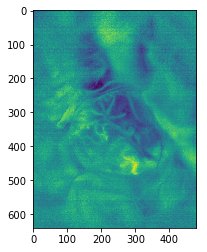

In [57]:
plt.imshow(np.reshape(Z,[640, 480]))
plt.show()

# Store results

In [58]:
pResult = 'res_sr_' + pioData
with h5py.File(pResult,"w") as f:
#  d1 = f.create_dataset('samples',data=samples)
  d2 = f.create_dataset('Z',data=Z)